# Cleaning

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('amazon_laptop_prices_v01.csv')


In [3]:
df

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price,Unnamed: 14
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99,NaN
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99,NaN
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5,"$1,599.00",NaN
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99,NaN
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,MSI,Stealth GS66 12UGS-025,15.6 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NVIDIA GeForce RTX 3070,1.8 GHz,1,"$1,699.00",NaN
4442,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99,NaN
4443,Dell,Inspiron 3511 Laptop,15.6 Inches,Black,512 GB,Core i3,8 GB,Windows 10 Home,Wifi & Bluetooth,Integrated,NaN,NaN,NaN,$591.99,NaN
4444,Dell,Latitude 3420 Laptop,14 Inches,NaN,512 GB,Core i5,8 GB,Windows 10 Pro,NaN,Integrated,Intel Integrated Graphics,0.9 GHz,NaN,"$1,771.99",NaN


In [4]:
df_cleaned = df.dropna(subset=['cpu', 'brand', 'screen_size', 'harddisk',  'ram', 'OS', 'graphics', 'graphics_coprocessor', 'cpu_speed', 'price'])
len(df_cleaned)

919

In [5]:
df_cleaned = df_cleaned.dropna(axis=1)
df_cleaned

,brand,screen_size,harddisk,cpu,ram,OS,graphics,graphics_coprocessor,cpu_speed,price
0,ROKC,14 Inches,1000 GB,Intel Core i7,8 GB,Windows 11,Integrated,Intel,1.2 GHz,$589.99
12,ROKC,15.6 Inches,1152 GB,Pentium,20 GB,Windows 11,Integrated,Intel,1.1 GHz,$389.99
13,HP,15.6 Inches,1000 GB,Pentium N5000,16 GB,Windows 11,Integrated,Intel,1.1 GHz,$459.99
17,Gateway,11.6 Inches,64 GB,Celeron N4020,4 GB,Windows 10 S,Integrated,Intel,1.1 GHz,$155.00
29,ROKC,14 Inches,1000 GB,Intel Core i7,8 GB,Windows 11,Integrated,Intel,1.2 GHz,$589.99
...,...,...,...,...,...,...,...,...,...,...
4434,ROKC,15.6 Inches,1152 GB,Pentium,20 GB,Windows 11,Integrated,Intel,1.1 GHz,$389.99
4435,HP,14 Inches,64 GB,Celeron N4000,16 GB,Windows 11,Integrated,Intel,1.1 GHz,$389.99
4436,HP,15.6 Inches,1000 GB,Pentium N5000,16 GB,Windows 11,Integrated,Intel,1.1 GHz,$459.99
4442,ROKC,14 Inches,1000 GB,Intel Core i7,8 GB,Windows 11,Integrated,Intel,1.2 GHz,$589.99


In [6]:
df_cleaned['price'] = df_cleaned['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [7]:
df_cleaned['price']

0        589.99
12       389.99
13       459.99
17       155.00
29       589.99
         ...   
4434     389.99
4435     389.99
4436     459.99
4442     589.99
4444    1771.99
Name: price, Length: 919, dtype: float64

In [8]:
df_cleaned = df_cleaned.reset_index()
df_cleaned

,index,brand,screen_size,harddisk,cpu,ram,OS,graphics,graphics_coprocessor,cpu_speed,price
0,0,ROKC,14 Inches,1000 GB,Intel Core i7,8 GB,Windows 11,Integrated,Intel,1.2 GHz,589.99
1,12,ROKC,15.6 Inches,1152 GB,Pentium,20 GB,Windows 11,Integrated,Intel,1.1 GHz,389.99
2,13,HP,15.6 Inches,1000 GB,Pentium N5000,16 GB,Windows 11,Integrated,Intel,1.1 GHz,459.99
3,17,Gateway,11.6 Inches,64 GB,Celeron N4020,4 GB,Windows 10 S,Integrated,Intel,1.1 GHz,155.00
4,29,ROKC,14 Inches,1000 GB,Intel Core i7,8 GB,Windows 11,Integrated,Intel,1.2 GHz,589.99
...,...,...,...,...,...,...,...,...,...,...,...
914,4434,ROKC,15.6 Inches,1152 GB,Pentium,20 GB,Windows 11,Integrated,Intel,1.1 GHz,389.99
915,4435,HP,14 Inches,64 GB,Celeron N4000,16 GB,Windows 11,Integrated,Intel,1.1 GHz,389.99
916,4436,HP,15.6 Inches,1000 GB,Pentium N5000,16 GB,Windows 11,Integrated,Intel,1.1 GHz,459.99
917,4442,ROKC,14 Inches,1000 GB,Intel Core i7,8 GB,Windows 11,Integrated,Intel,1.2 GHz,589.99


In [9]:
df_cleaned['cpu_speed'] = df_cleaned['cpu_speed'].str.replace(' GHz', '').str.replace(' Hz', '').astype(float)

In [10]:
df_cleaned['cpu_speed']

0      1.2
1      1.1
2      1.1
3      1.1
4      1.2
      ... 
914    1.1
915    1.1
916    1.1
917    1.2
918    0.9
Name: cpu_speed, Length: 919, dtype: float64

In [11]:
df_cleaned.head()

,index,brand,screen_size,harddisk,cpu,ram,OS,graphics,graphics_coprocessor,cpu_speed,price
0,0,ROKC,14 Inches,1000 GB,Intel Core i7,8 GB,Windows 11,Integrated,Intel,1.2,589.99
1,12,ROKC,15.6 Inches,1152 GB,Pentium,20 GB,Windows 11,Integrated,Intel,1.1,389.99
2,13,HP,15.6 Inches,1000 GB,Pentium N5000,16 GB,Windows 11,Integrated,Intel,1.1,459.99
3,17,Gateway,11.6 Inches,64 GB,Celeron N4020,4 GB,Windows 10 S,Integrated,Intel,1.1,155.00
4,29,ROKC,14 Inches,1000 GB,Intel Core i7,8 GB,Windows 11,Integrated,Intel,1.2,589.99


In [12]:
df_cleaned['screen_size'] = df_cleaned['screen_size'].str.replace(' Inches', '').astype(float)
df_cleaned['harddisk'] = df_cleaned['harddisk'].str.replace(' GB', '').str.replace(' TB', '000').astype(float)
df_cleaned['ram'] = df_cleaned['ram'].str.replace(' GB', '').astype(float)

In [13]:
df_cleaned['screen_size']

0      14.0
1      15.6
2      15.6
3      11.6
4      14.0
       ... 
914    15.6
915    14.0
916    15.6
917    14.0
918    14.0
Name: screen_size, Length: 919, dtype: float64

In [14]:
df_cleaned['harddisk']

0      1000.0
1      1152.0
2      1000.0
3        64.0
4      1000.0
        ...  
914    1152.0
915      64.0
916    1000.0
917    1000.0
918     512.0
Name: harddisk, Length: 919, dtype: float64

In [15]:
df_cleaned['ram']

0       8.0
1      20.0
2      16.0
3       4.0
4       8.0
       ... 
914    20.0
915    16.0
916    16.0
917     8.0
918     8.0
Name: ram, Length: 919, dtype: float64

In [16]:
df_cleaned.head()

,index,brand,screen_size,harddisk,cpu,ram,OS,graphics,graphics_coprocessor,cpu_speed,price
0,0,ROKC,14.0,1000.0,Intel Core i7,8.0,Windows 11,Integrated,Intel,1.2,589.99
1,12,ROKC,15.6,1152.0,Pentium,20.0,Windows 11,Integrated,Intel,1.1,389.99
2,13,HP,15.6,1000.0,Pentium N5000,16.0,Windows 11,Integrated,Intel,1.1,459.99
3,17,Gateway,11.6,64.0,Celeron N4020,4.0,Windows 10 S,Integrated,Intel,1.1,155.00
4,29,ROKC,14.0,1000.0,Intel Core i7,8.0,Windows 11,Integrated,Intel,1.2,589.99


In [17]:
df_cleaned['brand'].unique()

array(['ROKC', 'HP', 'Gateway', 'Lenovo', 'ASUS', 'LG', 'Dell',
       'Quality Refurbished Computers', 'Computer Upgrade King', 'MSI',
       'Alienware', 'acer', 'Toughbook'], dtype=object)

In [18]:
df_cleaned['graphics'].unique()

array(['Integrated', 'Dedicated', 'Integrated AMD Radeon™ Graphics',
       'Intel UHD Graphics', 'Integrated, Dedicated'], dtype=object)

In [19]:
for i in range(len(df_cleaned)):
    if 'Intel' in df_cleaned['graphics'][i]:
        df_cleaned['graphics'][i] = 'Integrated'
    if 'Integrated AMD' in df_cleaned['graphics'][i]:
        df_cleaned['graphics'][i] = 'Integrated'

In [20]:
df_cleaned['graphics'].unique()

array(['Integrated', 'Dedicated', 'Integrated, Dedicated'], dtype=object)

(array([886.,   0.,   0.,   0.,   0.,  31.,   0.,   0.,   0.,   2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

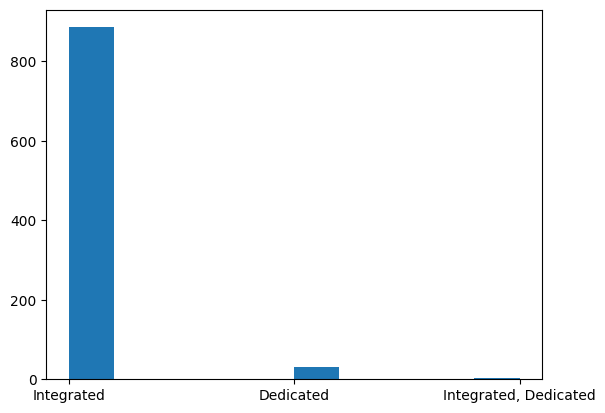

In [21]:
plt.hist(df_cleaned['graphics'])

In [22]:
df_cleaned['graphics_coprocessor'].unique()

array(['Intel', 'AMD Radeon R5', 'NVIDIA GeForce RTX 4070',
       'AMD Radeon 610M', 'Intel Iris Xe Graphics',
       'Intel Iris Xe Graphics eligible Integrated', 'Intel UHD Graphics',
       'NVIDIA GeForce RTX 4000', 'Intel HD Graphics 5000',
       'Intel Integrated Graphics', 'AMD Radeon Graphics',
       'Integrated AMD Radeon™ Graphics', 'INTEL',
       'Intel HD Graphics 620', 'NVIDIA RTX A2000 w/4GB', 'Intel HD 4000',
       'Intel HD Graphics 3000', 'NVIDIA GeForce RTX A4500',
       'NVIDIA GeForce RTX 3060', 'Intel UHD Graphics 600',
       'AMD Radeon RTX 3070', 'Intel HD Graphics 520',
       'Intel UHD Graphics 605', 'Integrated Graphics',
       'Intel HD Integrated Graphics', 'NVIDIA GeForce RTX 3080 Ti',
       'NVIDIA RTX A4500 16GB GDDR6 (4DP)', 'Intel UHD Graphics 620',
       'AMD Radeon R7', 'Integrated Intel® UHD 600 Graphics',
       'NVIDIA GeForce GTX 1070 OC with 8GB GDDR5',
       'NVIDIA GeForce GT 720M', 'Intel HD Graphics 400',
       'NVIDIA GeForce RT

In [23]:
for i in range(len(df_cleaned)):
    if 'RTX 4' in df_cleaned['graphics_coprocessor'][i]:
        df_cleaned['graphics_coprocessor'][i] = 'RTX 4000'
    elif 'RTX 3' in df_cleaned['graphics_coprocessor'][i]:
        df_cleaned['graphics_coprocessor'][i] = 'RTX 3000'
    elif 'RTX 2' in df_cleaned['graphics_coprocessor'][i]:
        df_cleaned['graphics_coprocessor'][i] = 'RTX 2000'
    

In [24]:
df_cleaned['graphics_coprocessor'].unique()

array(['Intel', 'AMD Radeon R5', 'RTX 4000', 'AMD Radeon 610M',
       'Intel Iris Xe Graphics',
       'Intel Iris Xe Graphics eligible Integrated', 'Intel UHD Graphics',
       'Intel HD Graphics 5000', 'Intel Integrated Graphics',
       'AMD Radeon Graphics', 'Integrated AMD Radeon™ Graphics', 'INTEL',
       'Intel HD Graphics 620', 'NVIDIA RTX A2000 w/4GB', 'Intel HD 4000',
       'Intel HD Graphics 3000', 'NVIDIA GeForce RTX A4500', 'RTX 3000',
       'Intel UHD Graphics 600', 'Intel HD Graphics 520',
       'Intel UHD Graphics 605', 'Integrated Graphics',
       'Intel HD Integrated Graphics',
       'NVIDIA RTX A4500 16GB GDDR6 (4DP)', 'Intel UHD Graphics 620',
       'AMD Radeon R7', 'Integrated Intel® UHD 600 Graphics',
       'NVIDIA GeForce GTX 1070 OC with 8GB GDDR5',
       'NVIDIA GeForce GT 720M', 'Intel HD Graphics 400',
       'AMD Athlon Silver', 'Quadro P1000',
       'Intel HD Graphics 4400 Integrated', 'NVIDIA Quadro T1000',
       'Intel HD Graphics 530', 'RTX 2

In [25]:
for i in range(len(df_cleaned)):
    if 'Intel' in df_cleaned['graphics_coprocessor'][i]:
        df_cleaned['graphics_coprocessor'][i] = 'Intel'

In [26]:
df_cleaned['graphics_coprocessor'].unique()

array(['Intel', 'AMD Radeon R5', 'RTX 4000', 'AMD Radeon 610M',
       'AMD Radeon Graphics', 'Integrated AMD Radeon™ Graphics', 'INTEL',
       'NVIDIA RTX A2000 w/4GB', 'NVIDIA GeForce RTX A4500', 'RTX 3000',
       'Integrated Graphics', 'NVIDIA RTX A4500 16GB GDDR6 (4DP)',
       'AMD Radeon R7', 'NVIDIA GeForce GTX 1070 OC with 8GB GDDR5',
       'NVIDIA GeForce GT 720M', 'AMD Athlon Silver', 'Quadro P1000',
       'NVIDIA Quadro T1000', 'RTX 2000', 'NVIDIA GeForce GTX 1060',
       'Integrated Iris Xe Graphics', 'AMD', 'NVIDIA GeForce GTX 965M',
       'NVIDIA Quadro P1000', 'NVIDIA GeForce GTX 1660Ti',
       '2GB NVIDIA GeForce MX230 Graphics'], dtype=object)

In [27]:
for i in range(len(df_cleaned)):
    if 'INTEL' in df_cleaned['graphics_coprocessor'][i]:
        df_cleaned['graphics_coprocessor'][i] = 'Intel'

In [28]:
df_cleaned['graphics_coprocessor'].unique()

array(['Intel', 'AMD Radeon R5', 'RTX 4000', 'AMD Radeon 610M',
       'AMD Radeon Graphics', 'Integrated AMD Radeon™ Graphics',
       'NVIDIA RTX A2000 w/4GB', 'NVIDIA GeForce RTX A4500', 'RTX 3000',
       'Integrated Graphics', 'NVIDIA RTX A4500 16GB GDDR6 (4DP)',
       'AMD Radeon R7', 'NVIDIA GeForce GTX 1070 OC with 8GB GDDR5',
       'NVIDIA GeForce GT 720M', 'AMD Athlon Silver', 'Quadro P1000',
       'NVIDIA Quadro T1000', 'RTX 2000', 'NVIDIA GeForce GTX 1060',
       'Integrated Iris Xe Graphics', 'AMD', 'NVIDIA GeForce GTX 965M',
       'NVIDIA Quadro P1000', 'NVIDIA GeForce GTX 1660Ti',
       '2GB NVIDIA GeForce MX230 Graphics'], dtype=object)

In [29]:
for i in range(len(df_cleaned)):
    if 'Quadro' in df_cleaned['graphics_coprocessor'][i]:
        df_cleaned['graphics_coprocessor'][i] = 'Nvidia Quadro'

In [30]:
df_cleaned['graphics_coprocessor'].unique()

array(['Intel', 'AMD Radeon R5', 'RTX 4000', 'AMD Radeon 610M',
       'AMD Radeon Graphics', 'Integrated AMD Radeon™ Graphics',
       'NVIDIA RTX A2000 w/4GB', 'NVIDIA GeForce RTX A4500', 'RTX 3000',
       'Integrated Graphics', 'NVIDIA RTX A4500 16GB GDDR6 (4DP)',
       'AMD Radeon R7', 'NVIDIA GeForce GTX 1070 OC with 8GB GDDR5',
       'NVIDIA GeForce GT 720M', 'AMD Athlon Silver', 'Nvidia Quadro',
       'RTX 2000', 'NVIDIA GeForce GTX 1060',
       'Integrated Iris Xe Graphics', 'AMD', 'NVIDIA GeForce GTX 965M',
       'NVIDIA GeForce GTX 1660Ti', '2GB NVIDIA GeForce MX230 Graphics'],
      dtype=object)

In [31]:
for i in range(len(df_cleaned)):
    if 'Radeon R5' in df_cleaned['graphics_coprocessor'][i]:
        df_cleaned['graphics_coprocessor'][i] = 'R5'
    elif 'Radeon R7' in df_cleaned['graphics_coprocessor'][i]:
        df_cleaned['graphics_coprocessor'][i] = 'R7'

In [32]:
df_cleaned['graphics_coprocessor'].unique()

array(['Intel', 'R5', 'RTX 4000', 'AMD Radeon 610M',
       'AMD Radeon Graphics', 'Integrated AMD Radeon™ Graphics',
       'NVIDIA RTX A2000 w/4GB', 'NVIDIA GeForce RTX A4500', 'RTX 3000',
       'Integrated Graphics', 'NVIDIA RTX A4500 16GB GDDR6 (4DP)', 'R7',
       'NVIDIA GeForce GTX 1070 OC with 8GB GDDR5',
       'NVIDIA GeForce GT 720M', 'AMD Athlon Silver', 'Nvidia Quadro',
       'RTX 2000', 'NVIDIA GeForce GTX 1060',
       'Integrated Iris Xe Graphics', 'AMD', 'NVIDIA GeForce GTX 965M',
       'NVIDIA GeForce GTX 1660Ti', '2GB NVIDIA GeForce MX230 Graphics'],
      dtype=object)

In [33]:
for i in range(len(df_cleaned)):
    if 'AMD' in df_cleaned['graphics_coprocessor'][i]:
        df_cleaned['graphics_coprocessor'][i] = 'AMD'

In [34]:
df_cleaned['graphics_coprocessor'].unique()

array(['Intel', 'R5', 'RTX 4000', 'AMD', 'NVIDIA RTX A2000 w/4GB',
       'NVIDIA GeForce RTX A4500', 'RTX 3000', 'Integrated Graphics',
       'NVIDIA RTX A4500 16GB GDDR6 (4DP)', 'R7',
       'NVIDIA GeForce GTX 1070 OC with 8GB GDDR5',
       'NVIDIA GeForce GT 720M', 'Nvidia Quadro', 'RTX 2000',
       'NVIDIA GeForce GTX 1060', 'Integrated Iris Xe Graphics',
       'NVIDIA GeForce GTX 965M', 'NVIDIA GeForce GTX 1660Ti',
       '2GB NVIDIA GeForce MX230 Graphics'], dtype=object)

In [35]:
for i in range(len(df_cleaned)):
    if 'NVIDIA RTX' in df_cleaned['graphics_coprocessor'][i]:
        df_cleaned['graphics_coprocessor'][i] = 'RTX'

In [36]:
df_cleaned['graphics_coprocessor'].unique()

array(['Intel', 'R5', 'RTX 4000', 'AMD', 'RTX',
       'NVIDIA GeForce RTX A4500', 'RTX 3000', 'Integrated Graphics',
       'R7', 'NVIDIA GeForce GTX 1070 OC with 8GB GDDR5',
       'NVIDIA GeForce GT 720M', 'Nvidia Quadro', 'RTX 2000',
       'NVIDIA GeForce GTX 1060', 'Integrated Iris Xe Graphics',
       'NVIDIA GeForce GTX 965M', 'NVIDIA GeForce GTX 1660Ti',
       '2GB NVIDIA GeForce MX230 Graphics'], dtype=object)

In [37]:
for i in range(len(df_cleaned)):
    if 'GTX 1' in df_cleaned['graphics_coprocessor'][i]:
        df_cleaned['graphics_coprocessor'][i] = 'GTX 1000'
df_cleaned['graphics_coprocessor'].unique()

array(['Intel', 'R5', 'RTX 4000', 'AMD', 'RTX',
       'NVIDIA GeForce RTX A4500', 'RTX 3000', 'Integrated Graphics',
       'R7', 'GTX 1000', 'NVIDIA GeForce GT 720M', 'Nvidia Quadro',
       'RTX 2000', 'Integrated Iris Xe Graphics',
       'NVIDIA GeForce GTX 965M', '2GB NVIDIA GeForce MX230 Graphics'],
      dtype=object)

In [38]:
for i in range(len(df_cleaned)):
    if 'NVIDIA' in df_cleaned['graphics_coprocessor'][i]:
        df_cleaned['graphics_coprocessor'][i] = 'Nvidia'
df_cleaned['graphics_coprocessor'].unique()

array(['Intel', 'R5', 'RTX 4000', 'AMD', 'RTX', 'Nvidia', 'RTX 3000',
       'Integrated Graphics', 'R7', 'GTX 1000', 'Nvidia Quadro',
       'RTX 2000', 'Integrated Iris Xe Graphics'], dtype=object)

(array([876.,   4.,   7.,   3.,   5.,  10.,   1.,   4.,   3.,   6.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

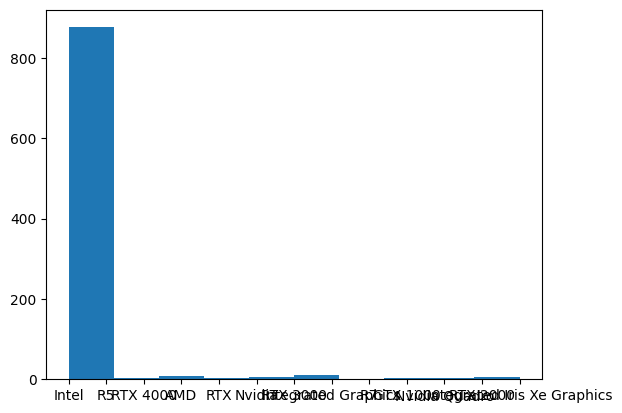

In [39]:
plt.hist(df_cleaned['graphics_coprocessor'])

In [40]:
df_cleaned

,index,brand,screen_size,harddisk,cpu,ram,OS,graphics,graphics_coprocessor,cpu_speed,price
0,0,ROKC,14.0,1000.0,Intel Core i7,8.0,Windows 11,Integrated,Intel,1.2,589.99
1,12,ROKC,15.6,1152.0,Pentium,20.0,Windows 11,Integrated,Intel,1.1,389.99
2,13,HP,15.6,1000.0,Pentium N5000,16.0,Windows 11,Integrated,Intel,1.1,459.99
3,17,Gateway,11.6,64.0,Celeron N4020,4.0,Windows 10 S,Integrated,Intel,1.1,155.00
4,29,ROKC,14.0,1000.0,Intel Core i7,8.0,Windows 11,Integrated,Intel,1.2,589.99
...,...,...,...,...,...,...,...,...,...,...,...
914,4434,ROKC,15.6,1152.0,Pentium,20.0,Windows 11,Integrated,Intel,1.1,389.99
915,4435,HP,14.0,64.0,Celeron N4000,16.0,Windows 11,Integrated,Intel,1.1,389.99
916,4436,HP,15.6,1000.0,Pentium N5000,16.0,Windows 11,Integrated,Intel,1.1,459.99
917,4442,ROKC,14.0,1000.0,Intel Core i7,8.0,Windows 11,Integrated,Intel,1.2,589.99


In [41]:
df_cleaned['OS'].unique()

array(['Windows 11', 'Windows 10 S', 'Windows 11 Home', 'Windows 11 Pro',
       'Chrome OS', 'Windows 7 Professional', 'Windows 7',
       'Windows 10 Pro 64 Bit-Multi-Language Supports English/Spanish/French',
       'Windows 10 S, Windows 10', 'Windows 10', 'Windows 10 Pro',
       'Windows 7 Home Premium', 'Windows 11 S',
       'Windows 10 Pro 64 Bit Multi-Language Support English/French/Spanish',
       'Windows 10 64 Bit-Multi-Language Supports English/Spanish/French',
       'Windows 10 Home', 'Windows 8',
       'Windows 10 Pro (English/French/Spanish)',
       'Win 10 Pro 64 Bit Multi-Language Support English/French/Spanish'],
      dtype=object)

In [42]:
for i in range(len(df_cleaned)):
    if 'Windows 7' in df_cleaned['OS'][i]:
        df_cleaned['OS'][i] = 'Win7'
    elif 'Windows 8' in df_cleaned['OS'][i]:
        df_cleaned['OS'][i] = 'Win8'
    elif 'Windows 10' in df_cleaned['OS'][i]:
        df_cleaned['OS'][i] = 'Win10'
    elif 'Windows 11' in df_cleaned['OS'][i]:
        df_cleaned['OS'][i] = 'Win11'
df_cleaned['OS'].unique()

array(['Win11', 'Win10', 'Chrome OS', 'Win7', 'Win8',
       'Win 10 Pro 64 Bit Multi-Language Support English/French/Spanish'],
      dtype=object)

(array([840.,   0.,  65.,   0.,   0.,   5.,   0.,   7.,   0.,   2.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

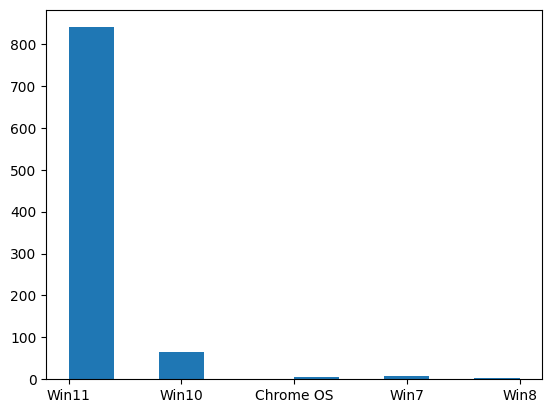

In [43]:
for i in range(len(df_cleaned)):
    if 'Win 10' in df_cleaned['OS'][i]:
        df_cleaned['OS'][i] = 'Win10'
plt.hist(df_cleaned['OS'])

In [44]:
df_cleaned

,index,brand,screen_size,harddisk,cpu,ram,OS,graphics,graphics_coprocessor,cpu_speed,price
0,0,ROKC,14.0,1000.0,Intel Core i7,8.0,Win11,Integrated,Intel,1.2,589.99
1,12,ROKC,15.6,1152.0,Pentium,20.0,Win11,Integrated,Intel,1.1,389.99
2,13,HP,15.6,1000.0,Pentium N5000,16.0,Win11,Integrated,Intel,1.1,459.99
3,17,Gateway,11.6,64.0,Celeron N4020,4.0,Win10,Integrated,Intel,1.1,155.00
4,29,ROKC,14.0,1000.0,Intel Core i7,8.0,Win11,Integrated,Intel,1.2,589.99
...,...,...,...,...,...,...,...,...,...,...,...
914,4434,ROKC,15.6,1152.0,Pentium,20.0,Win11,Integrated,Intel,1.1,389.99
915,4435,HP,14.0,64.0,Celeron N4000,16.0,Win11,Integrated,Intel,1.1,389.99
916,4436,HP,15.6,1000.0,Pentium N5000,16.0,Win11,Integrated,Intel,1.1,459.99
917,4442,ROKC,14.0,1000.0,Intel Core i7,8.0,Win11,Integrated,Intel,1.2,589.99


In [45]:
df_cleaned['brand'].describe()

count      919
unique      13
top       ROKC
freq       488
Name: brand, dtype: object

In [46]:
df_cleaned['OS'].describe()

count       919
unique        5
top       Win11
freq        840
Name: OS, dtype: object

In [47]:
df_cleaned['graphics_coprocessor'].describe()

count       919
unique       13
top       Intel
freq        874
Name: graphics_coprocessor, dtype: object

In [48]:
df_cleaned = df_cleaned.drop(columns=['index', 'cpu', ])

In [49]:
df_cleaned

,brand,screen_size,harddisk,ram,OS,graphics,graphics_coprocessor,cpu_speed,price
0,ROKC,14.0,1000.0,8.0,Win11,Integrated,Intel,1.2,589.99
1,ROKC,15.6,1152.0,20.0,Win11,Integrated,Intel,1.1,389.99
2,HP,15.6,1000.0,16.0,Win11,Integrated,Intel,1.1,459.99
3,Gateway,11.6,64.0,4.0,Win10,Integrated,Intel,1.1,155.00
4,ROKC,14.0,1000.0,8.0,Win11,Integrated,Intel,1.2,589.99
...,...,...,...,...,...,...,...,...,...
914,ROKC,15.6,1152.0,20.0,Win11,Integrated,Intel,1.1,389.99
915,HP,14.0,64.0,16.0,Win11,Integrated,Intel,1.1,389.99
916,HP,15.6,1000.0,16.0,Win11,Integrated,Intel,1.1,459.99
917,ROKC,14.0,1000.0,8.0,Win11,Integrated,Intel,1.2,589.99


# EDA 

In [50]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 919 non-null    object 
 1   screen_size           919 non-null    float64
 2   harddisk              919 non-null    float64
 3   ram                   919 non-null    float64
 4   OS                    919 non-null    object 
 5   graphics              919 non-null    object 
 6   graphics_coprocessor  919 non-null    object 
 7   cpu_speed             919 non-null    float64
 8   price                 919 non-null    float64
dtypes: float64(5), object(4)
memory usage: 64.7+ KB


In [51]:
df_cleaned.describe()

,screen_size,harddisk,ram,cpu_speed,price
count,919.000000,919.000000,919.000000,919.000000,919.000000
mean,14.752448,847.569097,14.583243,1.329554,585.107693
std,0.880614,416.793870,7.621734,0.634439,439.390782
min,11.600000,8.000000,2.000000,0.900000,99.990000
25%,14.000000,1000.000000,8.000000,1.100000,389.990000
50%,14.000000,1000.000000,16.000000,1.100000,459.990000
75%,15.600000,1000.000000,16.000000,1.200000,589.990000
max,17.300000,4000.000000,64.000000,5.600000,4762.760000


### Scatter Plot

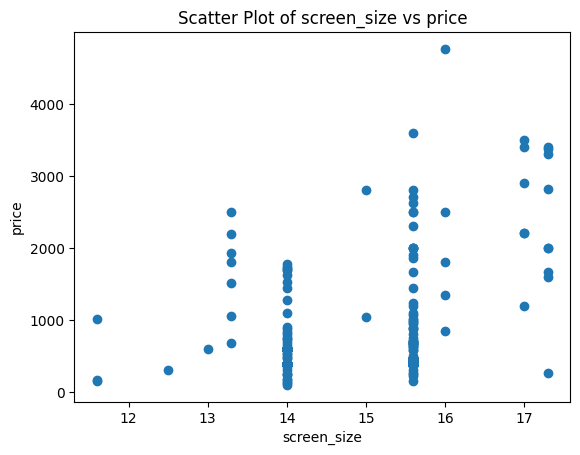

In [52]:
x_column = 'screen_size'
y_column = 'price'
plt.scatter(df_cleaned[x_column], df_cleaned[y_column])
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot of {x_column} vs {y_column}')
plt.show()


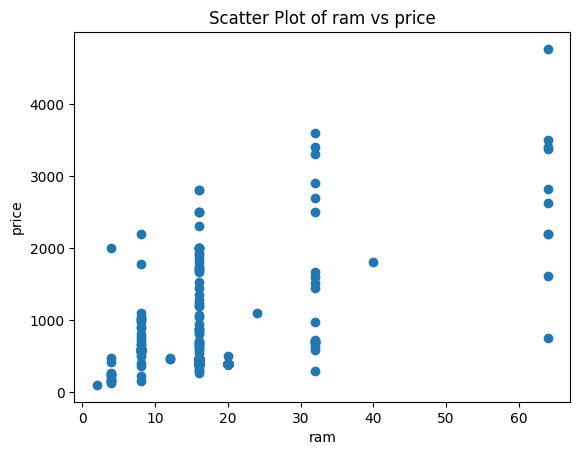

In [53]:
x_column = 'ram'
y_column = 'price'
plt.scatter(df_cleaned[x_column], df_cleaned[y_column])
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot of {x_column} vs {y_column}')
plt.show()

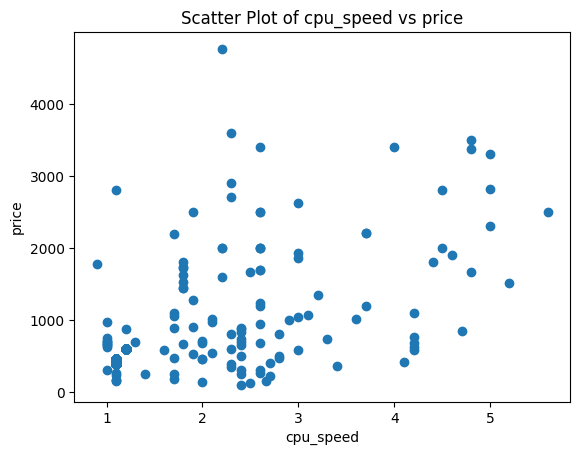

In [54]:
x_column = 'cpu_speed'
y_column = 'price'
plt.scatter(df_cleaned[x_column], df_cleaned[y_column])
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot of {x_column} vs {y_column}')
plt.show()

### Box Plot

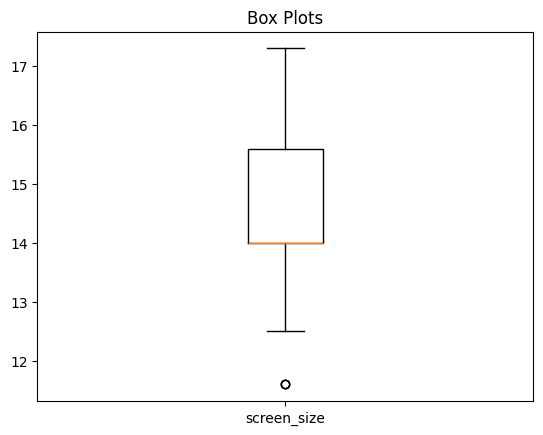

In [55]:
column_to_plot = ['screen_size']

# Create box plots using Matplotlib
plt.boxplot(df_cleaned[column_to_plot].values, labels=column_to_plot)
plt.title('Box Plots')
plt.show()


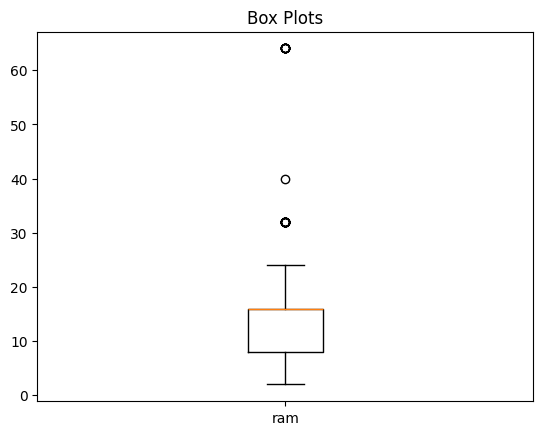

In [56]:
column_to_plot = ['ram']

# Create box plots using Matplotlib
plt.boxplot(df_cleaned[column_to_plot].values, labels=column_to_plot)
plt.title('Box Plots')
plt.show()

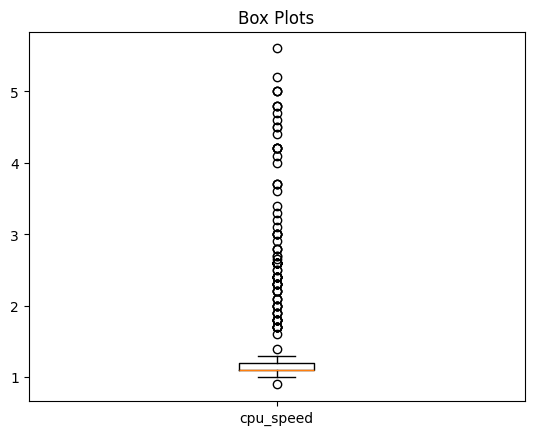

In [57]:
column_to_plot = ['cpu_speed']

# Create box plots using Matplotlib
plt.boxplot(df_cleaned[column_to_plot].values, labels=column_to_plot)
plt.title('Box Plots')
plt.show()

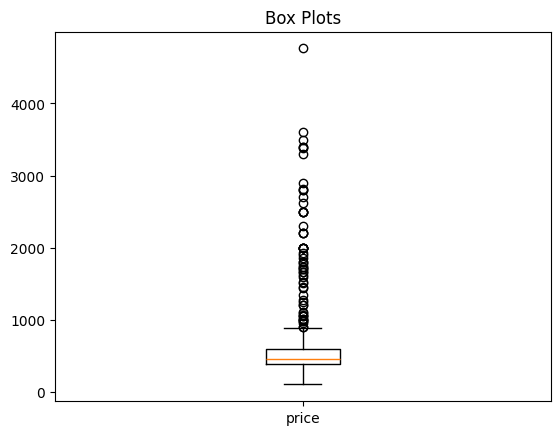

In [58]:
column_to_plot = ['price']

# Create box plots using Matplotlib
plt.boxplot(df_cleaned[column_to_plot].values, labels=column_to_plot)
plt.title('Box Plots')
plt.show()

### Correlation Matrix

<Axes: >

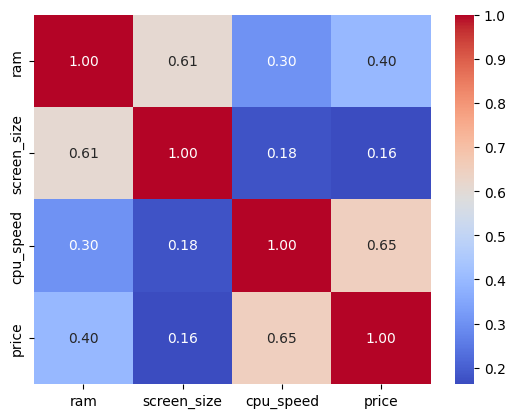

In [61]:
columns_to_include = ['ram', 'screen_size', 'cpu_speed', 'price']

# Select the desired columns
selected_data = df_cleaned[columns_to_include]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")